In [2]:
import pandas as pd
import plotly 
import matplotlib.pyplot as plt
import yfinance as yf

In [13]:
# Importing the yfinance package
import yfinance as yf
 
# Set the start and end date
start_date = '2018-01-01'
end_date = '2023-01-01'
 
# Set the ticker
ticker = 'SPOT'
 
# Get the data
data = yf.download(ticker, start_date, end_date).reset_index()
 


[*********************100%***********************]  1 of 1 completed


In [15]:
data[['Date' , 'Adj Close']]

,Date,Adj Close
0,2018-04-03,149.009995
1,2018-04-04,144.220001
2,2018-04-05,143.990005
3,2018-04-06,147.919998
4,2018-04-09,150.000000
...,...,...
1192,2022-12-23,77.699997
1193,2022-12-27,76.519997
1194,2022-12-28,76.610001
1195,2022-12-29,79.010002


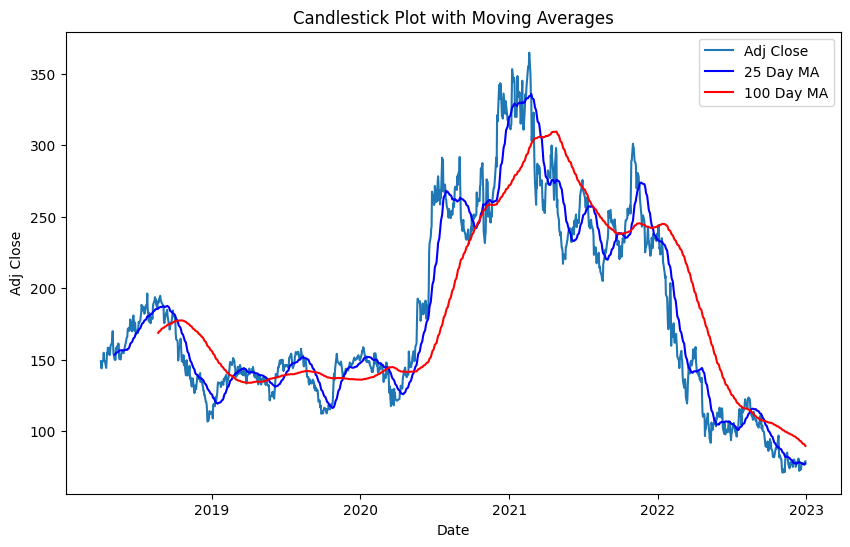

In [16]:
# Calculate the moving averages
short_ma = data['Adj Close'].rolling(window=25).mean()
long_ma = data['Adj Close'].rolling(window=100).mean()

# Create the candlestick plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adj Close')
plt.plot(data['Date'], short_ma, label='25 Day MA', color='blue')
plt.plot(data['Date'], long_ma, label='100 Day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Candlestick Plot with Moving Averages')
plt.legend()
plt.show()

In [58]:
import plotly.graph_objects as go
# Calculate the moving averages
short_ma = data['Adj Close'].rolling(window=25).mean()
long_ma = data['Adj Close'].rolling(window=100).mean()

# Create the candlestick plot
fig = go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Adj Close'],  name = 'SPOT')])

# Add the moving averages
fig.add_trace(go.Scatter(x=data['Date'], y=short_ma, line=dict(color='blue', width=1) , name = 'SMA 25'))
fig.add_trace(go.Scatter(x=data['Date'], y=long_ma, line=dict(color='red', width=1)  , name = 'SMA 100') )
fig.layout.title = 'Spotify (SPOT) Stock 2018-2022'
fig.layout.title.x = 0.5
fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Price'
fig.show(renderer="browser") 



# Show the plot
fig.show()